<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%979_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D1%96%D0%B2%D0%BD%D0%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
from scipy.optimize import linprog

# Змінні:
# x1 = кількість сайтів
# x2 = кількість інтернет-магазинів
# x3 = кількість ERP-інтеграцій

# ---- Цільова функція: max Z = 2*x1 + 9*x2 + 6*x3 (тис. $)
# linprog мінімізує, тому мінімізуємо -Z
c = np.array([-2, -9, -6], dtype=float)

# ---- Обмеження A_ub @ x <= b_ub
# Дизайнери:   12*x1 +  6*x2 +  2*x3 <= 320
# Розробники:  12*x1 + 24*x2 + 18*x3 <= 192
# Тестувальн.: 12*x1 + 18*x2 + 12*x3 <= 180
A_ub = np.array([
    [12,  6,  2],
    [12, 24, 18],
    [12, 18, 12]
], dtype=float)
b_ub = np.array([320, 192, 180], dtype=float)

# ---- Межі невід’ємності
bounds = [(0, None), (0, None), (0, None)]

# ---- Розв'язання (HiGHS)
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

if not res.success:
    raise RuntimeError(res.message)

x1, x2, x3 = res.x
revenue_thousands = -res.fun

print("Оптимальний план (кількість робіт):")
print(f"  Сайти (x1):            {x1:.6g}")
print(f"  Інтернет-магазини (x2): {x2:.6g}")
print(f"  ERP-інтеграції (x3):    {x3:.6g}")

print("\nСумарний місячний дохід (тис. $):", revenue_thousands)

# Контроль використання ресурсів
designers = 12*x1 +  6*x2 +  2*x3
devs      = 12*x1 + 24*x2 + 18*x3
testers   = 12*x1 + 18*x2 + 12*x3

print("\nВикористання ресурсів (год):")
print(f"  Дизайнери:   {designers:.6g} / 320")
print(f"  Розробники:  {devs:.6g} / 192")
print(f"  Тестувальник:{testers:.6g} / 180")


Оптимальний план (кількість робіт):
  Сайти (x1):            0
  Інтернет-магазини (x2): 8
  ERP-інтеграції (x3):    0

Сумарний місячний дохід (тис. $): 72.0

Використання ресурсів (год):
  Дизайнери:   48 / 320
  Розробники:  192 / 192
  Тестувальник:144 / 180


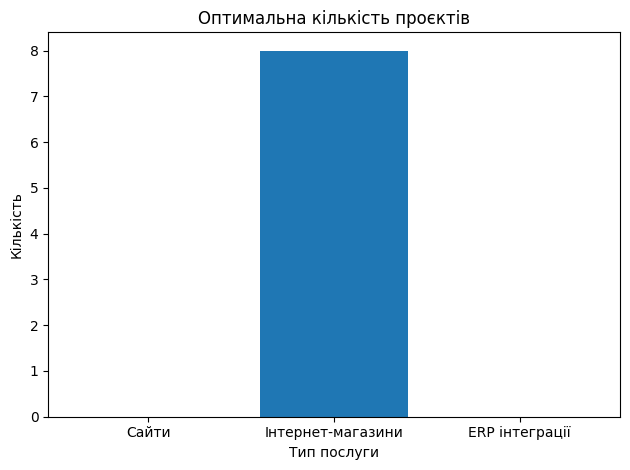

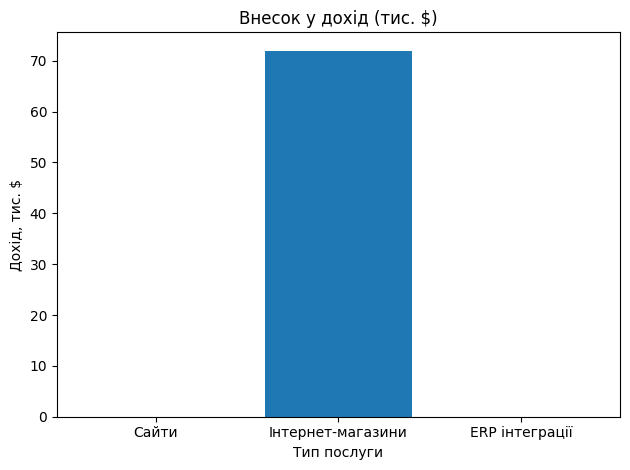

In [5]:
import matplotlib.pyplot as plt


# -------------------------------
# Візуалізація
# -------------------------------
# 1) Кількість проєктів
plt.figure()
plt.bar(services, x)
plt.title("Оптимальна кількість проєктів")
plt.ylabel("Кількість")
plt.xlabel("Тип послуги")
plt.tight_layout()

# 2) Внесок у дохід
revenues = prices * x
plt.figure()
plt.bar(services, revenues)
plt.title("Внесок у дохід (тис. $)")
plt.ylabel("Дохід, тис. $")
plt.xlabel("Тип послуги")
plt.tight_layout()

plt.show()


Оптимальний план за місяць: {'Сайти': np.float64(0.0), 'Інтернет-магазини': np.float64(8.0), 'ERP інтеграції': np.float64(0.0)}
Місячний дохід (тис. $): 72.0
Сумарний дохід за 12 міс. (тис. $): 864.0
Сумарний дохід (тис. $), базовий: 864.0
Сумарний дохід (тис. $), що-якщо: 842.4


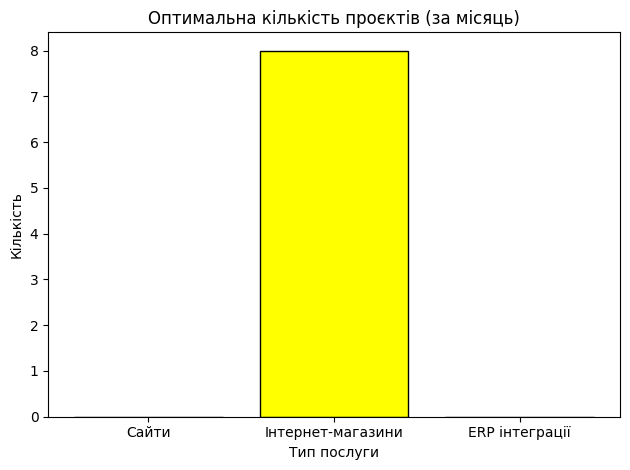

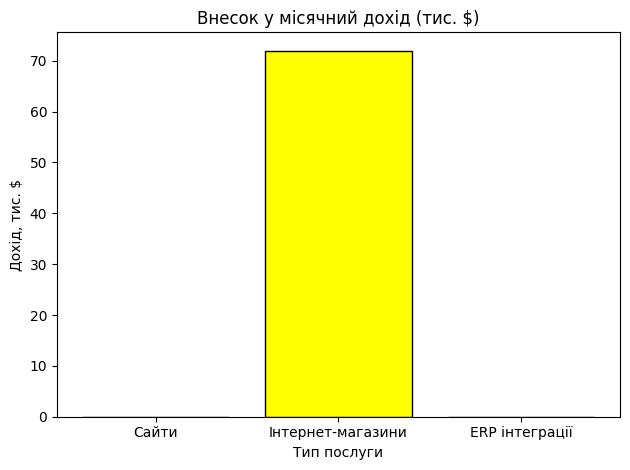

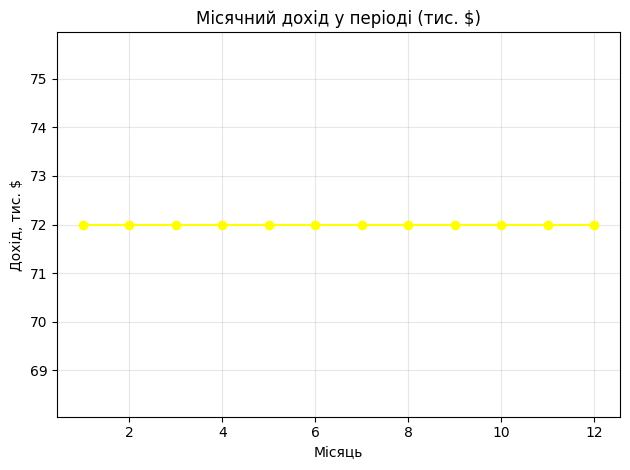

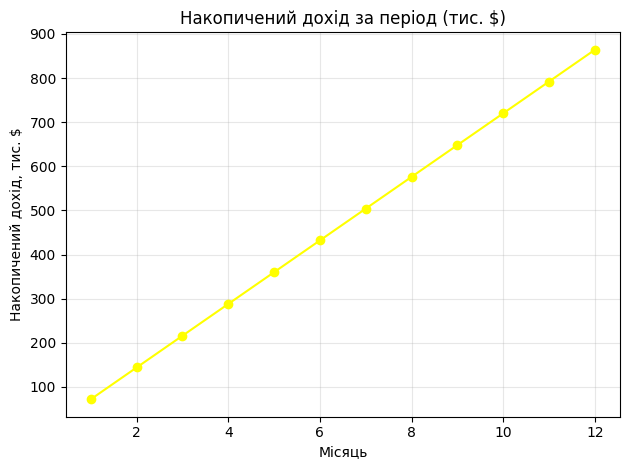

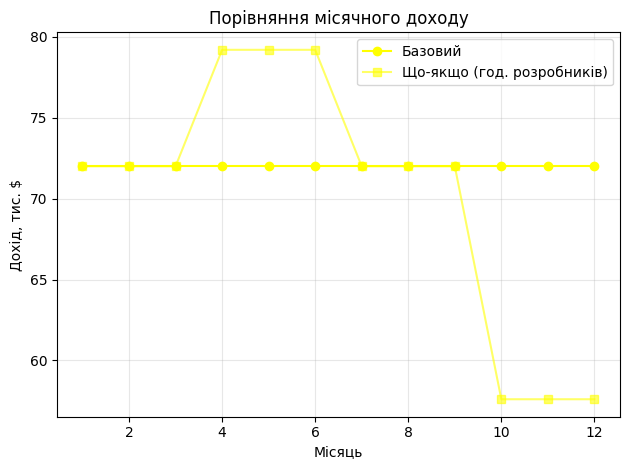

In [11]:
# pip install scipy numpy matplotlib
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# -------------------------------
# LP solver as a function
# -------------------------------
def solve_service_mix(
    designer_hours=320, developer_hours=192, tester_hours=180,
    prices=(2.0, 9.0, 6.0)
):
    """
    Повертає (x_opt, revenue_thousands):
      x_opt = [x1, x2, x3] (сайти, магазини, ERP)
      revenue_thousands = місячний дохід у тис. $
    """
    prices = np.array(prices, dtype=float)           # [2, 9, 6] тис. $
    c = -prices                                      # maximize -> minimize negative

    # Години на 1 проєкт (дизайнери / розробники / тестувальники)
    A_ub = np.array([
        [12,  6,  2],   # дизайнери
        [12, 24, 18],   # розробники
        [12, 18, 12],   # тестувальники
    ], dtype=float)
    b_ub = np.array([designer_hours, developer_hours, tester_hours], dtype=float)

    bounds = [(0, None), (0, None), (0, None)]       # x >= 0

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
    if not res.success:
        raise RuntimeError(res.message)

    x = res.x
    revenue_thousands = -res.fun
    return x, revenue_thousands

# -------------------------------
# Базовий місячний план
# -------------------------------
services = ["Сайти", "Інтернет-магазини", "ERP інтеграції"]
prices = np.array([2.0, 9.0, 6.0])

x_opt, revenue_th = solve_service_mix()
print("Оптимальний план за місяць:", dict(zip(services, x_opt)))
print("Місячний дохід (тис. $):", revenue_th)

# -------------------------------
# Візуалізації (жовтий колір)
# -------------------------------
# 1) Кількість проєктів
plt.figure()
plt.bar(services, x_opt, color="yellow", edgecolor="black")
plt.title("Оптимальна кількість проєктів (за місяць)")
plt.ylabel("Кількість")
plt.xlabel("Тип послуги")
plt.tight_layout()

# 2) Внесок у дохід за місяць
revenues_by_service = prices * x_opt
plt.figure()
plt.bar(services, revenues_by_service, color="yellow", edgecolor="black")
plt.title("Внесок у місячний дохід (тис. $)")
plt.ylabel("Дохід, тис. $")
plt.xlabel("Тип послуги")
plt.tight_layout()

# -------------------------------
# Дохід у періоді (напр., 12 місяців)
# -------------------------------
months = 12
monthly_revenue_base = np.full(months, revenue_th)
cum_revenue_base = np.cumsum(monthly_revenue_base)

# 3) Місячний дохід по періодах
plt.figure()
plt.plot(range(1, months+1), monthly_revenue_base, marker="o", color="yellow")
plt.title("Місячний дохід у періоді (тис. $)")
plt.xlabel("Місяць")
plt.ylabel("Дохід, тис. $")
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 4) Накопичений дохід
plt.figure()
plt.plot(range(1, months+1), cum_revenue_base, marker="o", color="yellow")
plt.title("Накопичений дохід за період (тис. $)")
plt.xlabel("Місяць")
plt.ylabel("Накопичений дохід, тис. $")
plt.grid(True, alpha=0.3)
plt.tight_layout()

print("Сумарний дохід за", months, "міс. (тис. $):", cum_revenue_base[-1])

# -------------------------------
# What-if: зміна годин розробників у часі
# Напр.: міс. 4–6 +10%, міс. 10–12 −20%
# -------------------------------
dev_base = 192
dev_series = np.full(months, dev_base, dtype=float)
dev_series[3:6] = dev_base * 1.10   # 4–6
dev_series[9:12] = dev_base * 0.80  # 10–12

whatif_monthly = []
for m in range(months):
    _, rev_m = solve_service_mix(developer_hours=dev_series[m])
    whatif_monthly.append(rev_m)
whatif_monthly = np.array(whatif_monthly)
whatif_cum = np.cumsum(whatif_monthly)

# 5) Порівняння базового vs що-якщо
plt.figure()
plt.plot(range(1, months+1), monthly_revenue_base, marker="o",
         color="yellow", label="Базовий")
plt.plot(range(1, months+1), whatif_monthly, marker="s",
         color="yellow", alpha=0.6, label="Що-якщо (год. розробників)")
plt.title("Порівняння місячного доходу")
plt.xlabel("Місяць")
plt.ylabel("Дохід, тис. $")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

print("Сумарний дохід (тис. $), базовий:", cum_revenue_base[-1])
print("Сумарний дохід (тис. $), що-якщо:", whatif_cum[-1])

plt.show()
